In [7]:
import numpy as np
import matplotlib.pyplot as plt
from syserol.tensor import perform_CMTF
from syserol.regression import function_prediction
from syserol.classify import class_predictions

In [2]:
tFac, _, _ = perform_CMTF()
X = tFac.factors[0]

In [24]:
perf = class_predictions(X)[1]
perfLO = np.zeros(X.shape[1])

for ii in range(X.shape[1]):
    XX = np.delete(X.copy(), ii, axis=1)
    perfLO[ii] = class_predictions(XX)[1]

print(perf - perfLO)

[ 0.01104972  0.         -0.00552486 -0.01104972  0.          0.02762431
  0.01657459  0.01657459  0.00552486  0.01104972]


In [36]:
perf = function_prediction(X, function="MIP1b")[2]
perfLO = np.zeros(X.shape[1])

for ii in range(X.shape[1]):
    XX = np.delete(X.copy(), ii, axis=1)
    perfLO[ii] = function_prediction(XX, function="MIP1b")[2]

print(perf - perfLO)

[ 0.0036118   0.00064108  0.01303646 -0.00190544 -0.00502199  0.03654309
  0.00167785  0.00521016 -0.00135514 -0.00283662]


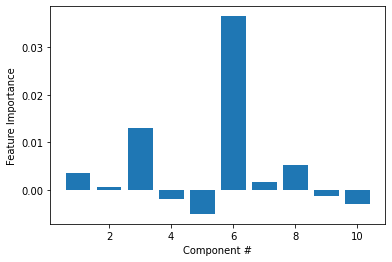

In [38]:
plt.bar(np.arange(1, X.shape[1]+1), perf - perfLO);
plt.ylabel("Feature Importance")
plt.xlabel("Component #");